# Logistic regression -Income Classifier

# 1.Problem Statement

Classification of income based on independent variables.Whether a person is earning more than or less than 50k

# 2.Importing Libraries and Dataset

In [1]:
#basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Importing Dataset


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\esvit\Downloads\Downloads\data science\data\Income.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,NaN,NaN,NaN
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,NaN,NaN,NaN
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,NaN,NaN,NaN
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,NaN,NaN,NaN
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,NaN,NaN,48842.0


In [4]:
data.shape

(48842, 18)

# EDA-Exploratory Dataanalysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        48842 non-null  object 
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  int64  
 5   marital-status   48842 non-null  object 
 6   occupation       48842 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  int64  
 11  capital-loss     48842 non-null  int64  
 12  hours-per-week   48842 non-null  int64  
 13  native-country   48842 non-null  object 
 14  income           48842 non-null  object 
 15  Unnamed: 15      1 non-null      object 
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17 

In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,Unnamed: 16,Unnamed: 17
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,0.0,1.0
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,NaN,48842.0
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,NaN,48842.0
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,NaN,48842.0
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,NaN,48842.0
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,NaN,48842.0
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,NaN,48842.0


# Data pre-processing

Checking duplicate data

In [7]:
data[data.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Unnamed: 15,Unnamed: 16,Unnamed: 17
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K,NaN,NaN,NaN
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,NaN,NaN,NaN
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,NaN,NaN,NaN
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN,NaN,NaN
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K,NaN,NaN,NaN
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,NaN,NaN,NaN
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K,NaN,NaN,NaN
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,NaN,NaN,NaN
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K,NaN,NaN,NaN
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K,NaN,NaN,NaN


In [8]:
data[data.duplicated()].shape

(52, 18)

In [9]:
#Dropping
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(48790, 18)

In [11]:
#all duplicates removed
data.duplicated().sum()

0

Removing Unwanted columns

In [12]:
data.drop(['fnlwgt','Unnamed: 15','Unnamed: 16','Unnamed: 17'],inplace=True,axis=1)
data.shape

(48790, 14)

checking unique values in object dtype column to check whthere there any wrong value

In [13]:
col=list(data.columns)
col

['age',
 'workclass',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [14]:
data['race'].dtypes

dtype('O')

In [15]:
for i in col:
    if data[i].dtypes=='O':
      
        print(data[i].value_counts(),end=' ')
        

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64 Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64 Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         560

We obeserved that->workclass,occupation and native country contains special character '?'.
Hence we need to repalce them with NaN

In [16]:
data.replace('?',np.NaN,inplace=True)

In [17]:
for i in col:
    if data[i].dtypes=='O':
      
        print(data[i].value_counts(),end=' ')
        

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64 Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64 Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                550

All special characters converted to Nan

Again checking for null values

In [18]:
data.isna().sum()

age                   0
workclass          2795
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [19]:
#dropping null values
data.dropna(axis=0,inplace=True)

In [20]:
data.shape

(45175, 14)

In [21]:
#checking format
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   education        45175 non-null  object
 3   educational-num  45175 non-null  int64 
 4   marital-status   45175 non-null  object
 5   occupation       45175 non-null  object
 6   relationship     45175 non-null  object
 7   race             45175 non-null  object
 8   gender           45175 non-null  object
 9   capital-gain     45175 non-null  int64 
 10  capital-loss     45175 non-null  int64 
 11  hours-per-week   45175 non-null  int64 
 12  native-country   45175 non-null  object
 13  income           45175 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


duplicates,null values and wrong values, formats have ebeen corrected

In [22]:
data

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Visualizations

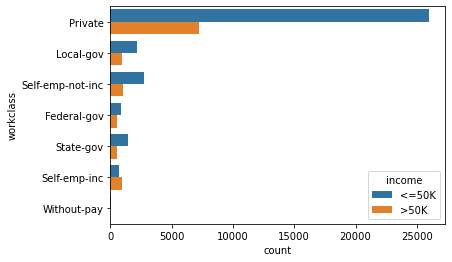

In [23]:
sns.countplot(data=data,y='workclass',hue='income')
plt.show()

Private employees earn most

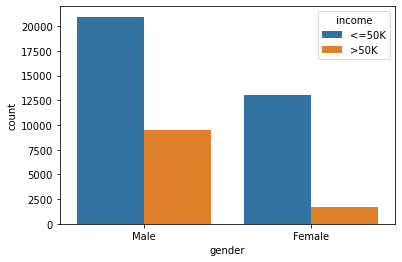

In [24]:
sns.countplot(data=data,x='gender',hue='income')
plt.show()

<AxesSubplot:xlabel='count', ylabel='occupation'>

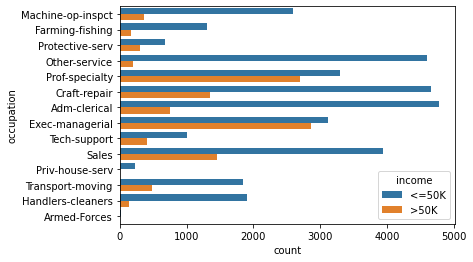

In [25]:
sns.countplot(data=data,y='occupation',hue='income')

Correlation

<AxesSubplot:>

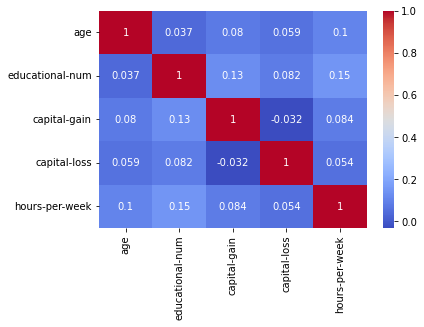

In [27]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [29]:
#checking y 
data['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

In [30]:
data.income.dtypes

dtype('O')

In [31]:
#Converting income variable to string 0,1
data['income'].replace(['<=50K','>50K'],[0,1],inplace=True)
#checking y 
data['income'].value_counts()

0    33973
1    11202
Name: income, dtype: int64

In [32]:
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


Converting string olumns to dummy variables

In [50]:
new_data=pd.get_dummies(data,drop_first=True)
new_data.shape

(45175, 96)

In [51]:
new_data.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
new_data.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cl

In [53]:
#Creating independent variable for model
x=new_data.drop('income',axis=1)


In [54]:
x

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
#y
y=new_data['income']
y.shape


(45175,)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [59]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((31622, 95), (13553, 95), (31622,), (13553,))

In [66]:
y_test

32612    1
1697     0
25071    1
26364    0
13858    0
        ..
15168    0
39491    0
23810    1
43784    0
2240     1
Name: income, Length: 13553, dtype: int64

In [60]:
lg=LogisticRegression()

Learning from xtrain and ytrain

In [61]:
lg.fit(x_train,y_train)

LogisticRegression()

In [62]:
lg.intercept_,lg.coef_

(array([-0.87437932]),
 array([[-2.64575587e-02,  8.77672664e-02,  3.55178183e-04,
          7.48604047e-04,  1.08396014e-02, -9.67886464e-02,
         -6.11243753e-01,  1.41520723e-01, -2.74592419e-01,
         -8.89849709e-02, -4.69402747e-03, -2.34076505e-01,
         -7.13725405e-02, -4.15168976e-02, -8.70717754e-02,
         -1.43871598e-01, -1.08710178e-01, -2.78392735e-02,
         -6.36559646e-02,  4.19506043e-01,  1.40421226e-01,
         -6.55843249e-01,  3.35855912e-01, -1.48991832e-02,
          1.62150178e-01, -3.06061408e-01,  6.69917848e-03,
          1.19545215e+00, -4.02034638e-02, -1.35240027e+00,
         -1.34278467e-01, -9.13551502e-02,  6.08226964e-04,
         -2.15574049e-01,  5.95233267e-01, -2.09774957e-01,
         -2.38199424e-01, -2.56968473e-01, -5.92591608e-01,
         -3.36739585e-02,  4.11596685e-01,  1.49106015e-02,
          5.77861684e-02,  5.37991438e-02, -9.52034279e-02,
         -6.35945027e-01, -1.83882027e-01, -8.16648939e-01,
         -4.85032

In [63]:
y_predict=lg.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [69]:
pd.DataFrame(lg.predict_proba(x_test))

,0,1
0,0.590631,0.409369
1,0.968579,0.031421
2,0.799823,0.200177
3,0.648161,0.351839
4,0.972543,0.027457
...,...,...
13548,0.989955,0.010045
13549,0.950820,0.049180
13550,0.731006,0.268994
13551,0.986034,0.013966


In [71]:
df=pd.DataFrame()
df['y_predict']=pd.DataFrame(y_predict)
df['y_test']=pd.DataFrame(y_test.values.reshape(-1,1))
df

,y_predict,y_test
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
13548,0,0
13549,0,0
13550,0,1
13551,0,0


# Validation

In [72]:
confusion_matrix(y_test,y_predict)

array([[9530,  662],
       [1507, 1854]], dtype=int64)

In [74]:
accuracy_score(y_test,y_predict)

0.8399616321109717

In [76]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10192
           1       0.74      0.55      0.63      3361

    accuracy                           0.84     13553
   macro avg       0.80      0.74      0.76     13553
weighted avg       0.83      0.84      0.83     13553

